# MMS, THEMIS, Arase

- https://github.com/heliophysicsPy/summer-school-24/blob/main/pyspedas-tutorial/MMS%2C%20THEMIS%2C%20Arase%20orbits%202023-03-24.ipynb

The THEMIS, MMS, and Arase missions provide useful data sets for studying geomagnetic storms.

How were their orbits oriented during the 2023-03-24 event?

We start by loading ephemeris data for the ERG satellite and the THEMIS and MMS constellations.

In [ ]:
import os
os.environ["SPEDAS_DATA_DIR"] = "./pyspedas_data"

28-Dec-24 19:13:48: File is current: ./pyspedas_data/themis/tha/l1/state/2023/tha_l1_state_20230324.cdf
28-Dec-24 19:13:49: File is current: ./pyspedas_data/themis/thb/l1/state/2023/thb_l1_state_20230324.cdf
28-Dec-24 19:13:50: File is current: ./pyspedas_data/themis/thc/l1/state/2023/thc_l1_state_20230324.cdf
28-Dec-24 19:13:51: File is current: ./pyspedas_data/themis/thd/l1/state/2023/thd_l1_state_20230324.cdf
28-Dec-24 19:13:51: File is current: ./pyspedas_data/themis/the/l1/state/2023/the_l1_state_20230324.cdf


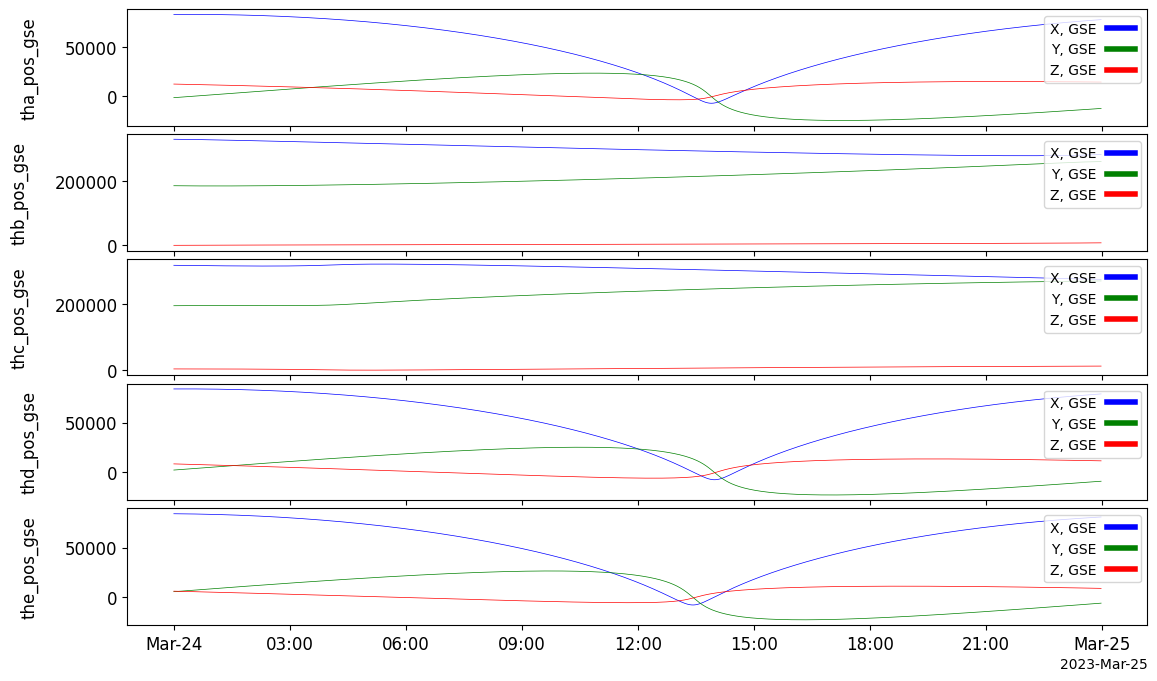

In [ ]:
import pyspedas
import pytplot
from pytplot import tplot

trange=['2023-03-24','2023-03-25']

# THEMIS orbits come from the 'state' datatype
# We will use GSE coordinates for the plots we'll make.

thm_state_vars = pyspedas.themis.state(probe=['a', 'b', 'c', 'd', 'e'], trange=trange, varformat='*_pos_gse')

tplot(thm_state_vars)

28-Dec-24 19:13:55: Loading ./pyspedas_data/mms/ancillary/mms1/defeph/MMS1_DEFEPH_2023082_2023083.V01
28-Dec-24 19:13:55: Loading ./pyspedas_data/mms/ancillary/mms1/defeph/MMS1_DEFEPH_2023083_2023084.V01
28-Dec-24 19:13:56: Loading ./pyspedas_data/mms/ancillary/mms2/defeph/MMS2_DEFEPH_2023082_2023083.V01
28-Dec-24 19:13:56: Loading ./pyspedas_data/mms/ancillary/mms2/defeph/MMS2_DEFEPH_2023083_2023084.V01
28-Dec-24 19:13:57: Loading ./pyspedas_data/mms/ancillary/mms3/defeph/MMS3_DEFEPH_2023082_2023083.V01
28-Dec-24 19:13:57: Loading ./pyspedas_data/mms/ancillary/mms3/defeph/MMS3_DEFEPH_2023083_2023084.V01
28-Dec-24 19:13:58: Loading ./pyspedas_data/mms/ancillary/mms4/defeph/MMS4_DEFEPH_2023082_2023083.V01
28-Dec-24 19:13:58: Loading ./pyspedas_data/mms/ancillary/mms4/defeph/MMS4_DEFEPH_2023083_2023084.V01


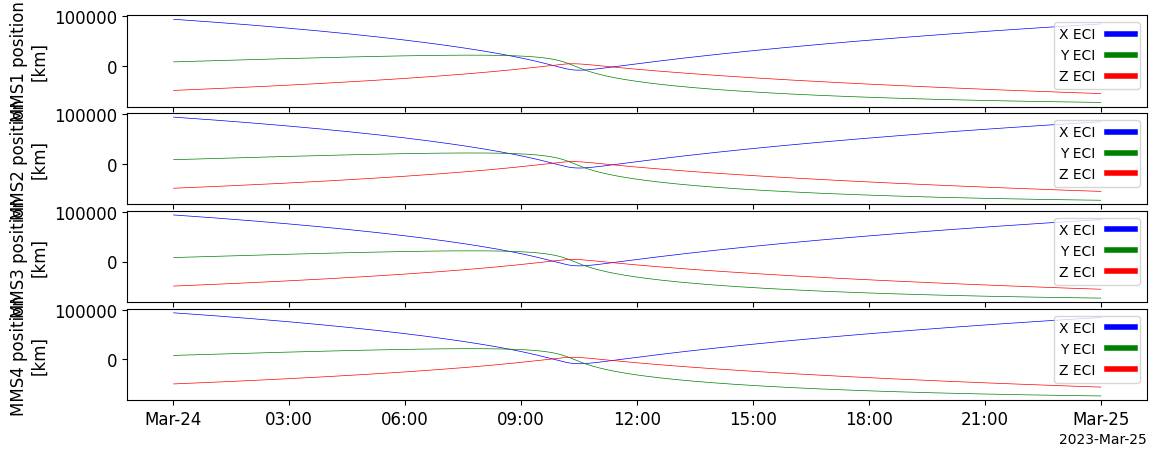

In [ ]:
# Now we'll load orbits for the four MMS probes

mms_state_vars = pyspedas.mms.mms_load_state(trange=trange,probe=['1','2','3','4'], datatypes='pos')
tplot(mms_state_vars)

The MMS orbit data is in ECI coordinates, so we'll need to transform to GSE.

The MMS MEC (Mission Ephemeris and Coordinates) data set includes quaternions for performing various coordinate transformations. We probably could have done this with pyspedas.cotrans (since ECI is more-or-less a synonym for GEI), but for this example we'll stay within the MMS ecosystem. That's good practice anyway, especially if you're trying to reproduce or compare to results produced by the MMS SOC.

28-Dec-24 19:13:59: Loading ./pyspedas_data/mms/mms1/mec/srvy/l2/epht89q/2023/03/mms1_mec_srvy_l2_epht89q_20230324_v2.2.0.cdf
28-Dec-24 19:14:00: Loading ./pyspedas_data/mms/mms2/mec/srvy/l2/epht89q/2023/03/mms2_mec_srvy_l2_epht89q_20230324_v2.2.0.cdf
28-Dec-24 19:14:00: Loading ./pyspedas_data/mms/mms3/mec/srvy/l2/epht89q/2023/03/mms3_mec_srvy_l2_epht89q_20230324_v2.2.0.cdf
28-Dec-24 19:14:00: Loading ./pyspedas_data/mms/mms4/mec/srvy/l2/epht89q/2023/03/mms4_mec_srvy_l2_epht89q_20230324_v2.2.0.cdf


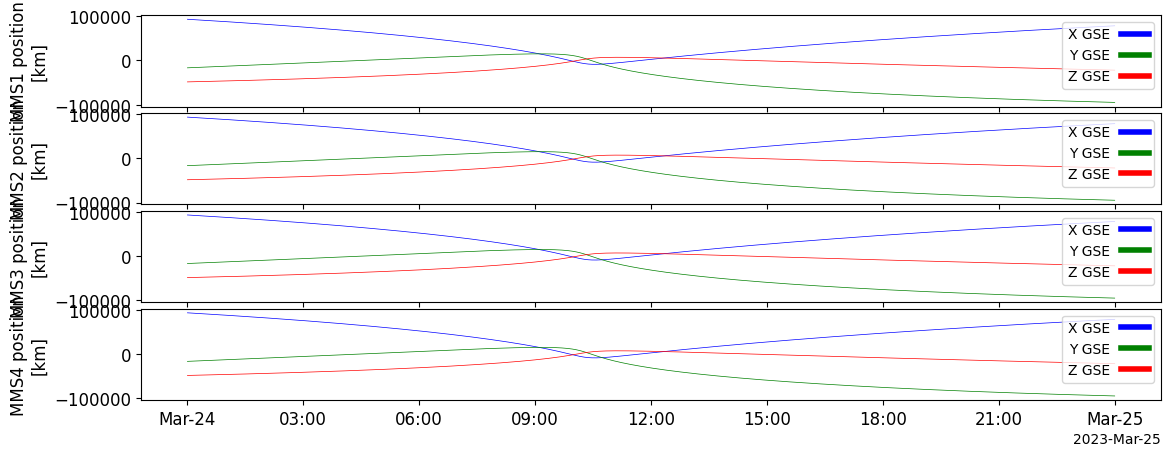

In [ ]:
pyspedas.mms.mec(trange=['2023-03-24/07:00','2023-03-24/08:00'], probe=['1','2','3','4'])

for i in ('1','2','3','4'): 
    pyspedas.mms.mms_qcotrans('mms'+i+'_defeph_pos','mms'+i+'_defeph_pos_gse',in_coord='eci',out_coord='gse')

mms_gse_vars = [mms_state_vars[i] + '_gse' for i in range(4)]
tplot(mms_gse_vars)

Now we'll load orbit data for Arase (ERG)

28-Dec-24 19:14:46: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2023/
28-Dec-24 19:14:47: File is current: ./pyspedas_data/ergsc/satellite/erg/orb/def/2023/erg_orb_l2_20230324_v04.cdf
28-Dec-24 19:14:47: erg_orb_l2_pos_gsm is currently not in pytplot.
28-Dec-24 19:14:47: erg_orb_l2_pos_sm is currently not in pytplot.
28-Dec-24 19:14:47: erg_orb_l2_pos_rmlatmlt is currently not in pytplot.
28-Dec-24 19:14:47: erg_orb_l2_pos_eq is currently not in pytplot.
28-Dec-24 19:14:47: erg_orb_l2_pos_iono_north is currently not in pytplot.
28-Dec-24 19:14:47: erg_orb_l2_pos_iono_south is currently not in pytplot.
28-Dec-24 19:14:47: erg_orb_l2_pos_blocal is currently not in pytplot.
28-Dec-24 19:14:47: erg_orb_l2_pos_blocal_mag is currently not in pytplot.
28-Dec-24 19:14:47: erg_orb_l2_pos_beq is currently not in pytplot.
28-Dec-24 19:14:47: erg_orb_l2_pos_Lm is currently not in pytplot.
28-Dec-24 19:14:47: erg_orb_l2_vel_gse is currently not in py

 
**************************************************************************
['Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data']

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


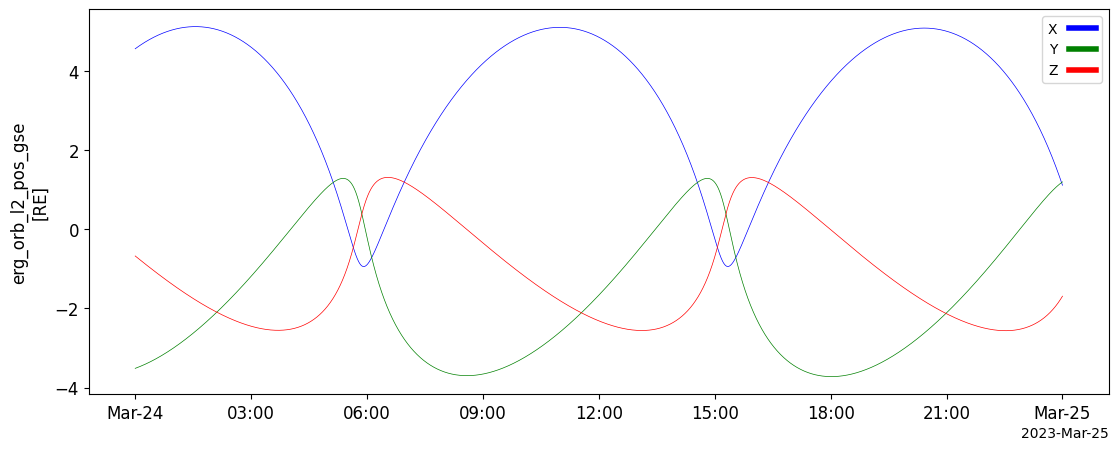

In [ ]:
erg_orb_vars = pyspedas.erg.orb(trange=trange, varformat='*pos_gse')

tplot(erg_orb_vars)

We would also like to see where the spacecraft are with respect to the magnetopause.
PySPEDAS implements a couple different magnetopause models.  We'll use the T96 model,
which takes arrays of X, Y, Z coordinates, and a model parameter P_dyn, the dynamic pressure
of the solar wind.
 
P_dyn can be obtained from the OMNIweb data set.  Let's take a look:

28-Dec-24 19:15:04: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2023/
28-Dec-24 19:15:05: File is current: ./pyspedas_data/omni/hro2_1min/2023/omni_hro2_1min_20230301_v01.cdf
28-Dec-24 19:15:08: Integer data values for variable AE_INDEX are all fillval (99999).
28-Dec-24 19:15:08: Integer data values for variable AL_INDEX are all fillval (99999).
28-Dec-24 19:15:08: Integer data values for variable AU_INDEX are all fillval (99999).


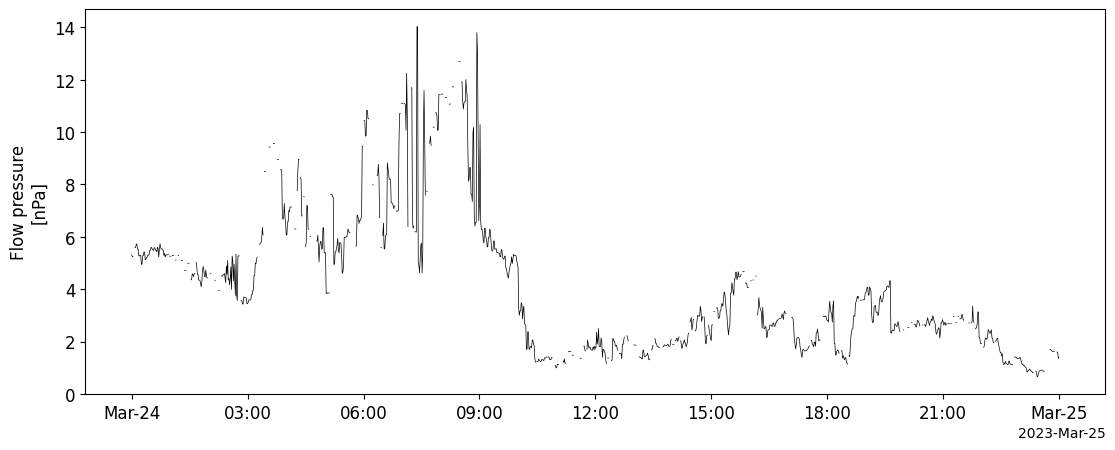

In [ ]:
pyspedas.omni.data(trange=trange)
tplot('Pressure')

On that date, the OMNIWeb solar wind data shows wide variation in the dynamic pressure, with
values as high as 14 nanoPascals in the early part of the day, settling down to a more typical
values around 3.0 later in the day.   We'll generate two model boundaries, one with P_dyn at 14.0, and another at 3.0, 
to show the effect of the pressure on the magnetopause location.

We'll use the THEMIS-A spacecraft positions for 2023-03-24.
The mpause_t96() routine operates in GSM coordinates, using units of Earth radii.  We can use the GSE position variable we've already loaded, and call pyspedas.cotrans to convert it to GSM coordinates.

The model returns three 90-element arrays representing the X, Y, and Z components of the magnetopause
boundary coordinates. For each input position, the model returns a flag indicating whether the input
was inside or outside the magnetopause, and the distance to the nearest point on the magnetopause.  We'll only be using the 
boundary coordinates.

28-Dec-24 19:16:12: ['gse', 'gsm']
28-Dec-24 19:16:12: Running transformation: subgse2gsm
28-Dec-24 19:16:12: Output variable: tha_pos_gsm


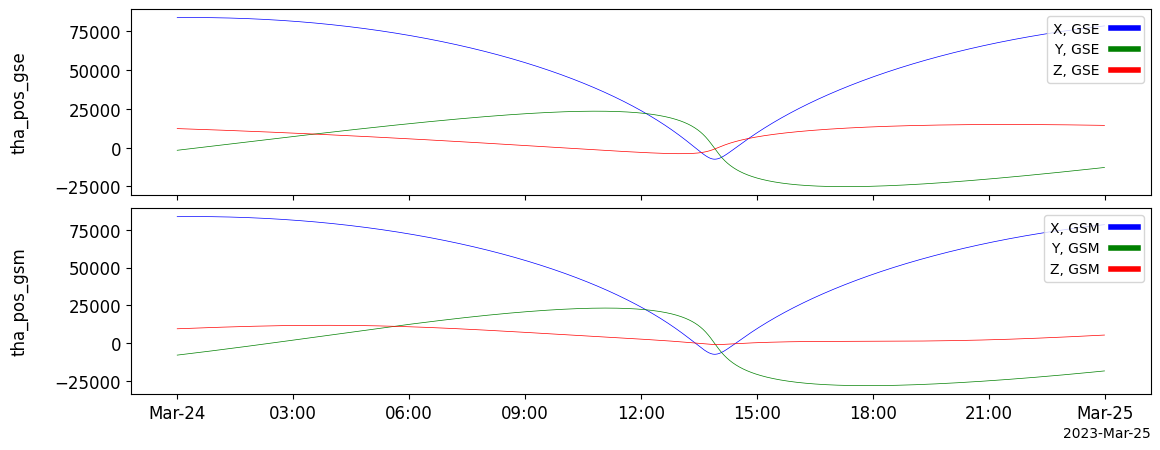

28-Dec-24 19:16:12: ['gsm', 'gse']
28-Dec-24 19:16:12: Running transformation: subgsm2gse
28-Dec-24 19:16:12: Output variable: mpause_gse_hi
28-Dec-24 19:16:12: ['gsm', 'gse']
28-Dec-24 19:16:12: Running transformation: subgsm2gse
28-Dec-24 19:16:12: Output variable: mpause_gse_low


1

In [ ]:
import numpy as np

pyspedas.cotrans('tha_pos_gse', name_out='tha_pos_gsm', coord_in='GSE', coord_out='GSM')

# Update the plot labels on the output variable to reflect the new coordinate system
pyspedas.options('tha_pos_gsm','legend_names',['X, GSM', 'Y, GSM', 'Z, GSM'])
tplot(['tha_pos_gse', 'tha_pos_gsm'])

# The mpause_t96 routine takes array inputs rather than tplot variables, so we need to 
# pull them out of tha_pos_gsm using pytplot.get_data()

posdat = pytplot.get_data('tha_pos_gsm')

# We'll also get a copy of the metadata dictionary for tha_pos_gsm, which we can use to create additional tplot variables
from copy import deepcopy
posmeta = deepcopy(pytplot.get_data('tha_pos_gsm',metadata=True))

# And we need to convert to units of Earth radii

re = 6378.0
pos_gsm = posdat.y / re

# Generate the magnetopause boundary coordinates, using the THEMIS position data and P_dyn=14.0

xmgnp, ymgnp, zmgnp, id, distan = pyspedas.mpause_t96(
        pd=14.0, xgsm=pos_gsm[:, 0], ygsm=pos_gsm[:, 1], zgsm=pos_gsm[:, 2])

# We only get 90 points for the magnetopause boundary, so we can't match them up with
# the original times from the s/c positions. But we would still like to make tplot variables,
# so we'll just repeat the first timestamp for all the boundary points.

mp_dat = np.stack([xmgnp, ymgnp, zmgnp], axis=1)
mp_times = np.repeat(posdat.times[0],len(mp_dat))
pytplot.store_data('mpause_gsm_hi',data={'x':mp_times, 'y':mp_dat},attr_dict=posmeta)

# Now we'll repeat the process using P_dyn = 3.0
xmgnp, ymgnp, zmgnp, id, distan = pyspedas.mpause_t96(
        pd=3.0, xgsm=pos_gsm[:, 0], ygsm=pos_gsm[:, 1], zgsm=pos_gsm[:, 2])

mp_dat = np.stack([xmgnp, ymgnp, zmgnp], axis=1)
pytplot.store_data('mpause_gsm_low',data={'x':mp_times, 'y':mp_dat},attr_dict=posmeta)

# Transform the magnetopause boundary positions to GSE coordinates, to be consistent with the
# orbit plots we will make.

pyspedas.cotrans('mpause_gsm_hi', name_out='mpause_gse_hi', coord_in='GSM', coord_out='GSE')
pyspedas.cotrans('mpause_gsm_low', name_out='mpause_gse_low', coord_in='GSM', coord_out='GSE')

# We won't bother plotting the boundary coordinates with tplot(), since there's only a single repeated timestamp

Now we're ready to make some orbit plots!  pytplot doesn't (yet) have a nice tool for
projecting 3D tplot variables onto 2D plots to trace out an orbit, so we'll do this
directly in matplotlib.

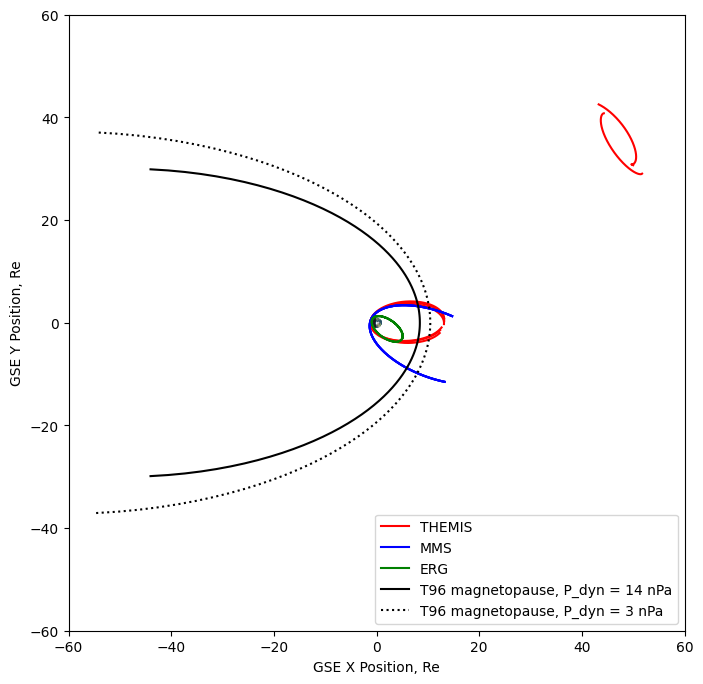

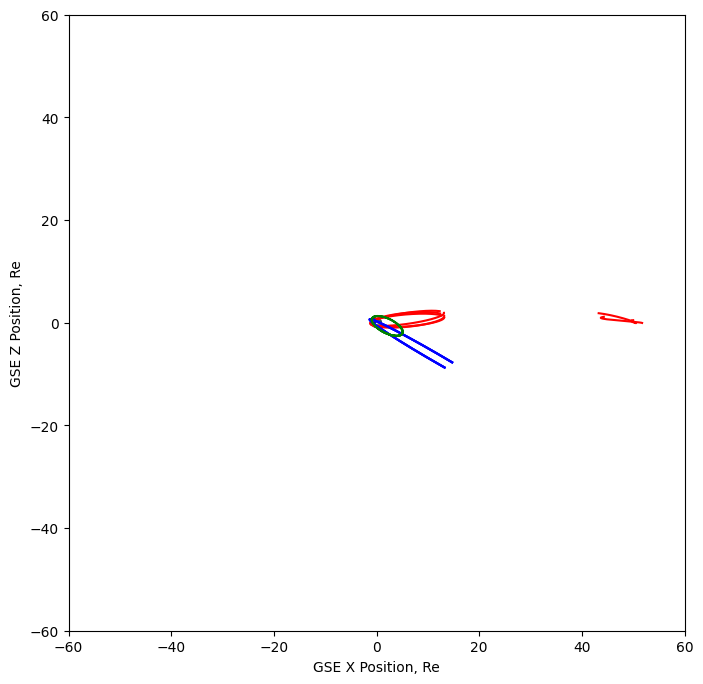

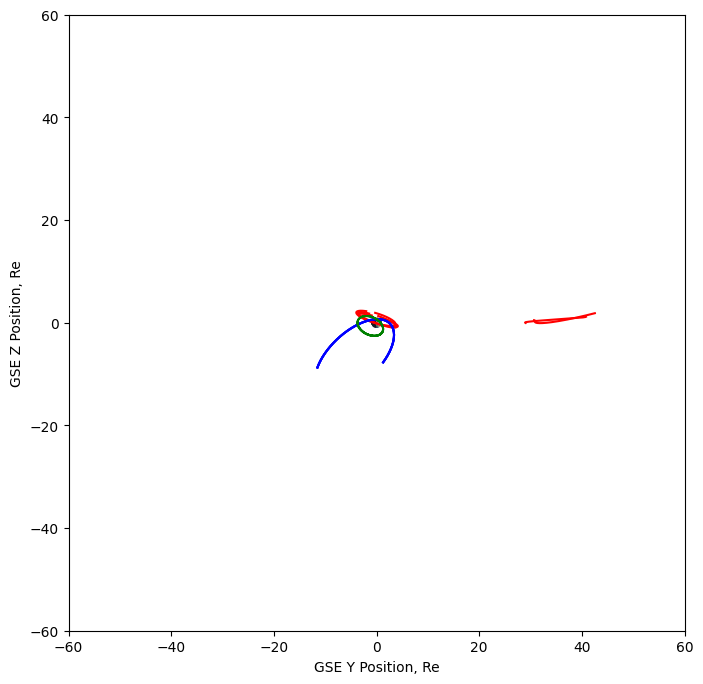

In [ ]:
import matplotlib.pyplot as plt
from pytplot import get_data
import os

# Set the plot size

xsize = 8.0
ysize = 8.0

# The pyspedas.mms module contains a nice PNG of the earth that we can add to our orbit plots.
# We get the path to the pyspedas.mms directory, and from there we can find the PNG.

from pyspedas.mms import __file__ as mmsinitfile
mms_init_file_path = os.path.realpath(mmsinitfile)
mms_parent_dir = os.path.dirname(mms_init_file_path)
png_path = mms_parent_dir + '/mec/earth_polar1.png'
im = plt.imread(png_path)

# We'll generate three plots, showing the orbits in the XY, XZ, and YZ planes in GSE coordinates
# For each plot, we'll set consistent axis ranges and aspect ratios, and add the Earth image
# at the origin.

# XY plane: looking down from above the north pole
xyfig, xyaxis = plt.subplots(sharey=True, sharex=True, figsize=(xsize, ysize))
xyaxis.set_aspect('equal')
xyaxis.set_xlim([-60,60])
xyaxis.set_ylim([-60,60])
xyaxis.imshow(im, extent=(-1, 1, -1, 1))
xyaxis.set_xlabel('GSE X Position, Re')
xyaxis.set_ylabel('GSE Y Position, Re')

# XZ plane: looking from the side in the ecliptic plane
xzfig, xzaxis = plt.subplots(sharey=True, sharex=True, figsize=(xsize, ysize))
xzaxis.set_aspect('equal')
xzaxis.set_xlim([-60,60])
xzaxis.set_ylim([-60,60])
xzaxis.imshow(im, extent=(-1, 1, -1, 1))
xzaxis.set_xlabel('GSE X Position, Re')
xzaxis.set_ylabel('GSE Z Position, Re')

# YZ plane: looking from the Sun towards Earth
yzfig, yzaxis = plt.subplots(sharey=True, sharex=True, figsize=(xsize, ysize))
yzaxis.set_aspect('equal')
yzaxis.set_xlim([-60,60])
yzaxis.set_ylim([-60,60])
yzaxis.imshow(im, extent=(-1, 1, -1, 1))
yzaxis.set_xlabel('GSE Y Position, Re')
yzaxis.set_ylabel('GSE Z Position, Re')


# Convert THEMIS and MMS positions to units of Earth radii, keeping the same variable names

for v in thm_state_vars:
    pytplot.tkm2re(v, newname=v)
    
for v in mms_state_vars:
    pytplot.tkm2re(v, newname=v)

# ERG positions are already in Re!

# Make master lists of orbit variables and colors (red for THEMIS, blue for MMS, green for ERG)
probe_vars = []
probe_cols = []

probe_vars.extend(thm_state_vars)
probe_cols.extend(['r', 'r', 'r', 'r', 'r'])

probe_vars.extend(mms_state_vars)
probe_cols.extend(['b', 'b', 'b', 'b'])

probe_vars.extend(erg_orb_vars)
probe_cols.extend(['g'])

# For each variable, project the 3-D orbit data onto three 2-D plots

for var,col in zip(probe_vars,probe_cols):
    d = get_data(var)
    # We'll ignore d.times, and only look at the position vectors d.y[]
    xyaxis.plot(d.y[:, 0], d.y[:, 1],color=col)
    xzaxis.plot(d.y[:, 0], d.y[:, 2],color=col)
    yzaxis.plot(d.y[:, 1], d.y[:, 2],color=col)

# We want to label the lines on the XY orbit plot, but we have several probes for the THEMIS
# and MMS constellations.  To avoid multiple legend entries, rather than specifying labels
# in the plot loop above, we'll just make a few plot calls with empty lists and the appropriate
# colors and labels.

xyaxis.plot([], [], color='r',label='THEMIS')
xyaxis.plot([], [], color='b',label='MMS')
xyaxis.plot([], [], color='g',label='ERG')

# Get the data values for the high-pressure magnetopause boundary and plot on the XY plane.
mp_dat = pytplot.get_data('mpause_gse_hi')
xyaxis.plot(mp_dat.y[:,0],mp_dat.y[:,1],color='k',linestyle='solid', label="T96 magnetopause, P_dyn = 14 nPa")

# Get the data values for the low-pressure magnetopause boundary and plot on the XY plane.
mp_dat = pytplot.get_data('mpause_gse_low')
xyaxis.plot(mp_dat.y[:,0],mp_dat.y[:,1],color='k',linestyle='dotted', label='T96 magnetopause, P_dyn = 3 nPa')

# Place the legend at the lower right where it won't cover anything interesting
xyaxis.legend(loc='lower right')

# Show the plots!

plt.show()